<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [85]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [86]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [87]:
movies["duration"].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [88]:
movies[["title",'duration']].sort_values(by="duration").head(10)

,title,duration
389,Freaks,64
338,Battleship Potemkin,66
258,The Cabinet of Dr. Caligari,67
293,Duck Soup,68
88,The Kid,68
742,Following,69
351,Frankenstein,70
938,Alice in Wonderland,75
405,The Bride of Frankenstein,75
303,The Nightmare Before Christmas,76


In [89]:
movies[["title",'duration']].sort_values(by="duration", ascending=False).head(10)

,title,duration
476,Hamlet,242
157,Gone with the Wind,238
78,Once Upon a Time in America,229
142,Lagaan: Once Upon a Time in India,224
445,The Ten Commandments,220
85,Lawrence of Arabia,216
204,Ben-Hur,212
17,Seven Samurai,207
767,"It's a Mad, Mad, Mad, Mad World",205
630,Malcolm X,202


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [90]:
movies["duration"].min()

64

In [91]:
movies['duration'].max()

242

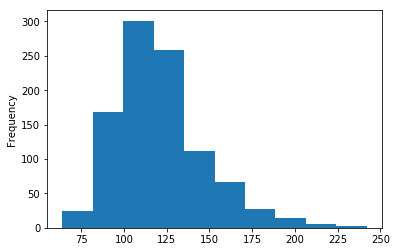

In [92]:
movies["duration"].plot.hist(bins=10);

#### Use a box plot to display that same data.

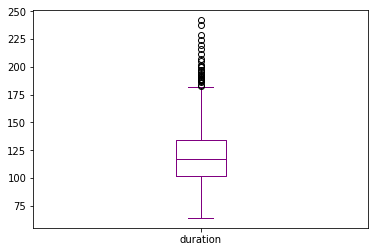

In [93]:
movies["duration"].plot(kind='box',color='purple');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [94]:
movies.groupby('content_rating').title.count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

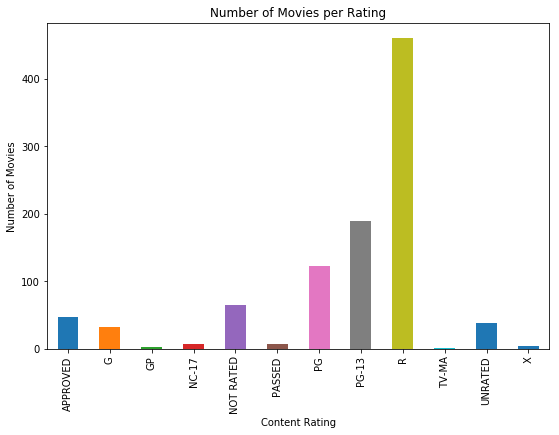

In [95]:
movies.groupby('content_rating').title.count().plot(kind='bar',figsize=(9,6))
plt.xlabel('Content Rating');
plt.ylabel('Number of Movies');
plt.title('Number of Movies per Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [96]:
movies.replace(to_replace =["NOT RATED", "APPROVED","PASSED","GP"], value ="UNRATED",inplace=True) 

In [97]:
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [27]:
movies.replace(to_replace =["X", "TV-MA"], value ="NC-17",inplace=True) 

In [98]:
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Count the number of missing values in each column.

In [99]:
movies[movies.isnull()].sum()

star_rating       0.0
title             0.0
content_rating    0.0
genre             0.0
duration          0.0
actors_list       0.0
dtype: float64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [100]:
movies[movies['duration'] > 120].star_rating.mean()

7.953669724770622

In [101]:
movies[movies['duration'] < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

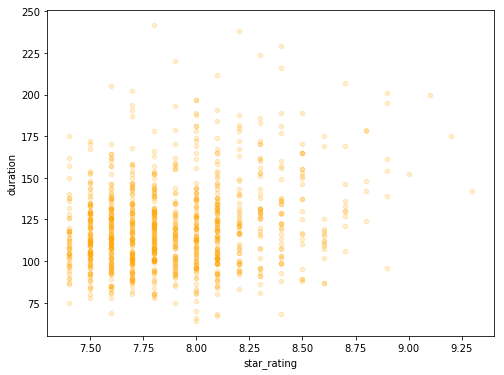

In [5]:
movies.plot.scatter(x='star_rating',y='duration',figsize=(8,6),color='orange',alpha=0.2);

#### Calculate the average duration for each genre.

In [103]:
movies.groupby("genre").duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

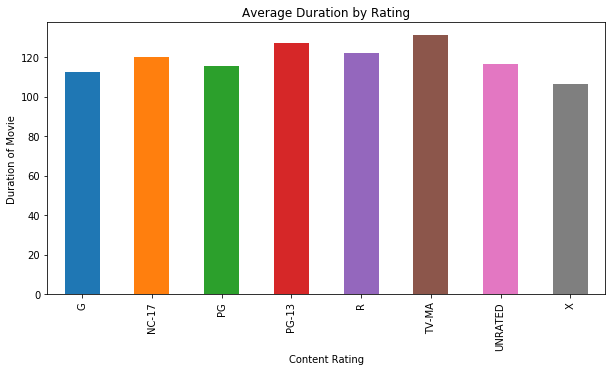

In [104]:
movies.groupby("content_rating").duration.mean().plot(kind='bar', x='content_rating', y='duration',figsize=(10,5));
plt.xlabel('Content Rating');
plt.ylabel('Duration of Movie');
plt.title('Average Duration by Rating');

#### Determine the top rated movie (by star rating) for each genre.

In [108]:
movies.groupby(["genre",'star_rating']).title.value_counts().sort_values(ascending=True).head(150)

genre   star_rating  title                                         
Action  7.4          La Femme Nikita                                   1
Drama   7.5          Begin Again                                       1
                     Biutiful                                          1
                     Calvary                                           1
                     Cloud Atlas                                       1
                     Devil's Advocate                                  1
                     Doubt                                             1
                     Good Night, and Good Luck.                        1
                     Inside Llewyn Davis                               1
                     Legends of the Fall                               1
                     Life as a House                                   1
                     Malena                                            1
                     Miracle                            

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [109]:
movies[movies['title'].duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [110]:
suspects=['The Girl with the Dragon Tattoo','Dracula','Les Miserables','True Grit']
movies[movies['title'].isin(suspects)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [111]:
movies['genre'].value_counts()>10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [6]:
OverTen=['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']

In [7]:
movies[movies.genre.isin(OverTen)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [115]:
movies.groupby('genre').star_rating.mean() for movie in OverTen

SyntaxError: invalid syntax (<ipython-input-115-12c55a9bf586>, line 1)

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

#### Option 4: aggregate by count and mean, then filter using the count

## Bonus

#### Figure out something "interesting" using the actors data!